In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.rc('font', size=14)
plt.rc('axes', labelsize = 14, titlesize = 14)
plt.rc('legend', fontsize = 14)
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize= 10)

In [ ]:
np.random.seed(42)

m = 100
X = 2*np.random.rand(m,1)
y= 4 + 3*X + np.random.randn(m,1)

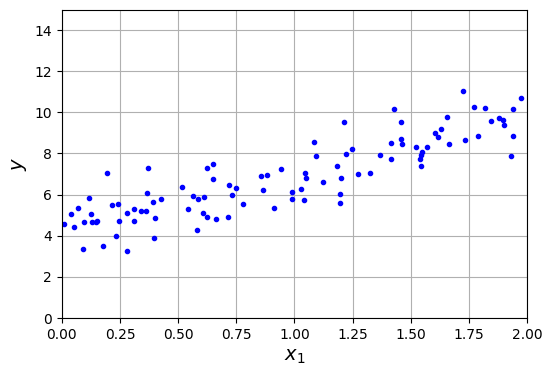

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.axis([0, 2, 0, 15])
plt.grid();

In [ ]:
matrix_a = np.array([[1, 2],[3,4]])
matrix_b = np.array([[5, 6], [7, 8]])

result = matrix_a @ matrix_b
result1 = np.dot(matrix_a, matrix_b)

print('Matrix A:')
print(matrix_a)
print('\nMatrix b:')
print(matrix_b)
print('\nResult of Matrix multiplication (A @ B):')
print(result1)

Matrix A:
[[1 2]
 [3 4]]

Matrix b:
[[5 6]
 [7 8]]

Result of Matrix multiplication (A @ B):
[[19 22]
 [43 50]]


In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)

theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

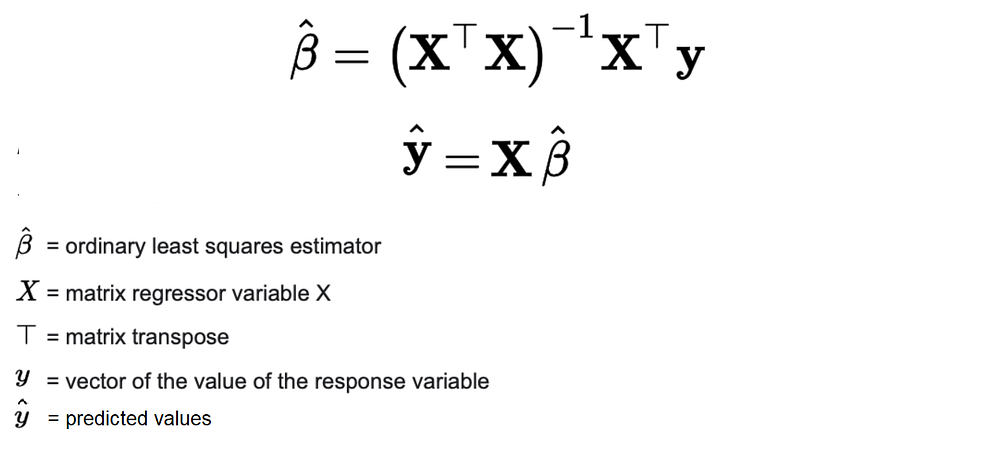

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)

y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

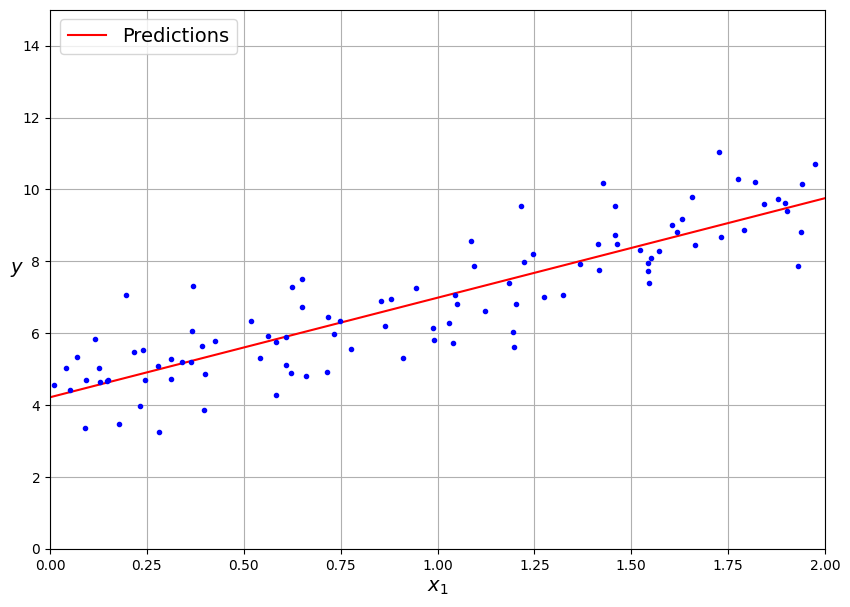

In [ ]:
plt.figure(figsize = (10, 7))
plt.plot(X_new, y_predict, 'r-', label = 'Predictions')
plt.plot(X, y, 'b.')

plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation = 0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc= 'upper left')

plt.show()

In [ ]:
def linreg(X, y):
  return np.linalg.inv(X.T @ X) @ X.T @ y

print(linreg(X_b, y))

[[4.21509616]
 [2.77011339]]


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_      #intercept b-di, coefficent ise W - di

(array([4.21509616]), array([[2.77011339]]))

#Gradient descent

Batch (or FULL ) Gradient descent

In [ ]:
eta = 0.1
n_epochs = 10000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  gradient = 1/ m * 2 *X_b.T @ (X_b @ theta - y)
  theta = theta - eta * gradient

In [ ]:
theta

array([[4.21509616],
       [2.77011339]])

Stochastic Gradient Descent (stochastic = random)

In [ ]:
np.random.seed(42)
eta = 0.1
m=len(X_b)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for iteraction in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index + 1]
    yi = y[random_index : random_index +1]
    gradients = 2*xi.T @ (xi @ theta - yi)
    theta = theta - eta * gradients

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg= SGDRegressor(max_iter = 1000, tol = 1e-5, penalty = None, eta0 = 0.01,
                     n_iter_no_change=100, random_state = 42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

Mini Batch

In [ ]:
from math import ceil

n_epochs = 50
eta = 0.1
m = len(X_b)
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for iteration in range (0, n_batches_per_epoch):
    idx = iteration * minibatch_size
    xi = X_b_shuffled[idx : idx + minibatch_size]
    yi = y_shuffled[idx: idx + minibatch_size]
    gradientss = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
    theta = theta -eta * gradients

In [ ]:
theta

array([[-9.9795498 ],
       [-1.68968693]])

#Polynomial Regression

In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

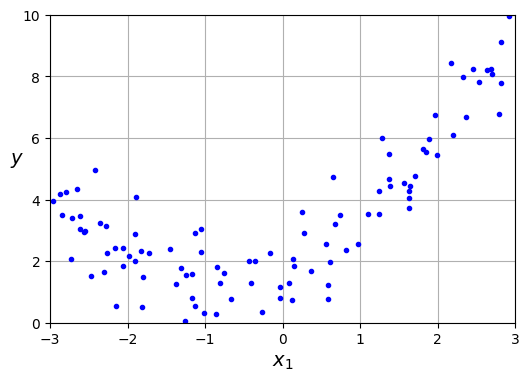

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation = 0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [ ]:
lin_reg.fit(X, y)
predictions = lin_reg.predict([[-3], [3]])
predictions

array([[1.03315352],
       [6.09487734]])

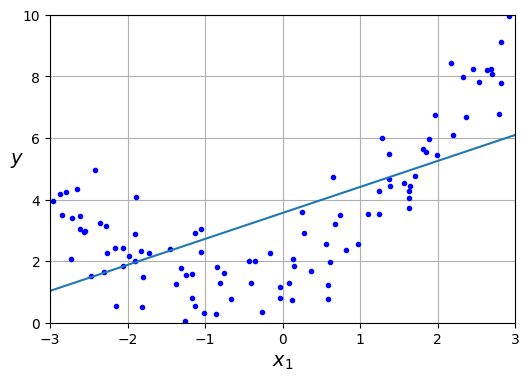

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(X, y, 'b.')
plt.plot([-3, 3], predictions)
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation = 0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [ ]:
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [ ]:
model = lin_reg.fit(X_poly, y)
poly_predict = model.predict

In [ ]:
X.shape

(100, 1)

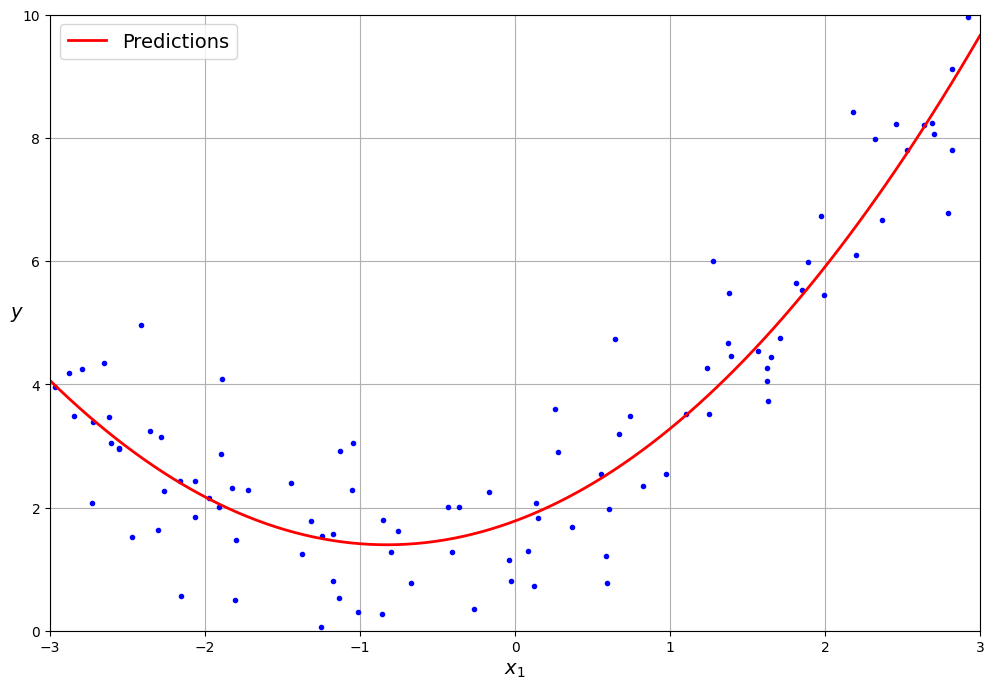

In [ ]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)       # linspace -3 ve 3 arasinda 100 value yaratdi
y_new = lin_reg.predict(X_new_poly)               # tekce transform eledi ki, oyrendiyi data uzerinden transform elesin

plt.figure(figsize = (12,8))
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth = 2, label = 'Predictions')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation = 0)
plt.legend(loc = 'upper left')
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

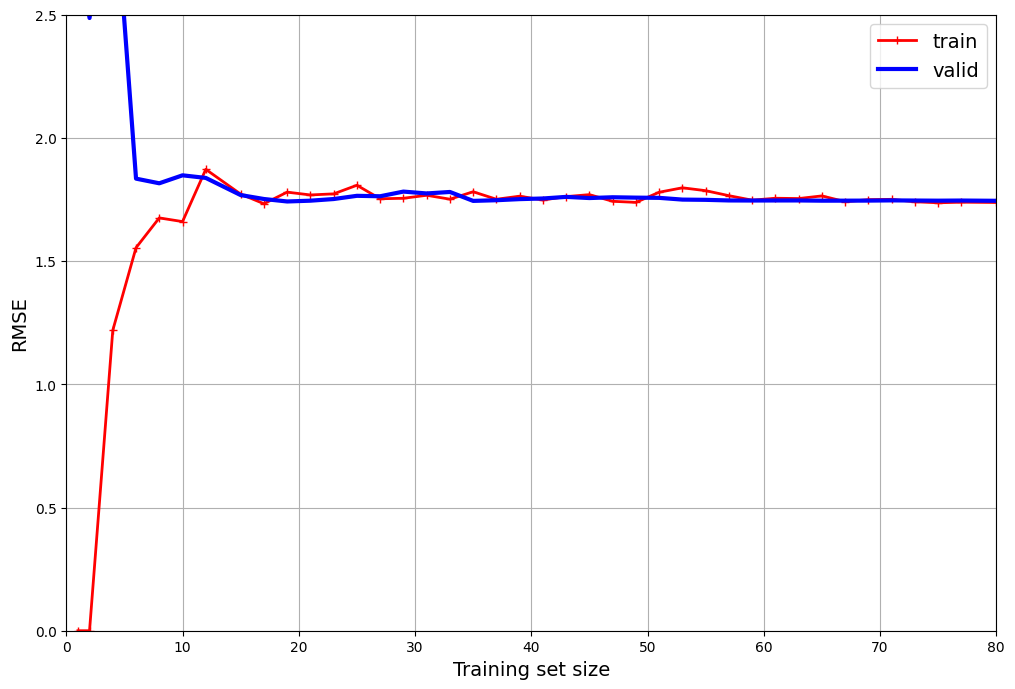

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes = np.linspace(0.01, 1.0, 40), cv = 5,
    scoring = 'neg_root_mean_squared_error'

)

train_errors = -train_scores.mean(axis = 1)
valid_errors = -valid_scores.mean(axis = 1)

plt.figure(figsize = (12, 8))
plt.plot(train_sizes, train_errors, 'r-+', linewidth = 2, label='train')
plt.plot(train_sizes, valid_errors, 'b-', linewidth = 3, label='valid')

plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.grid()
plt.legend(loc='upper right')
plt.axis([0, 80, 0, 2.5])

plt.show()

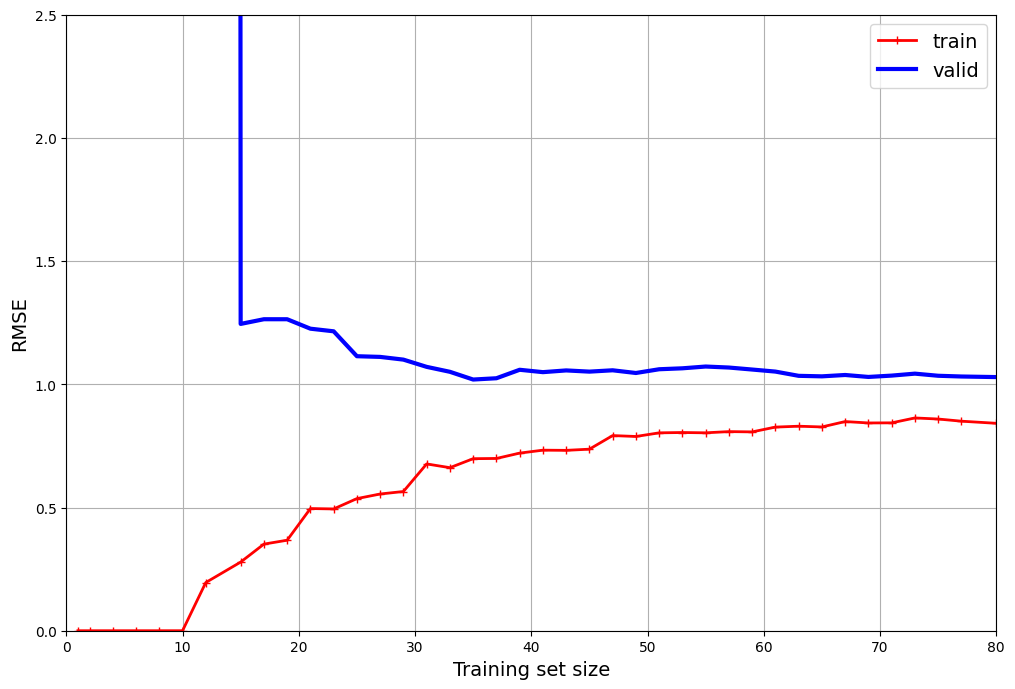

In [ ]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes = np.linspace(0.01, 1.0, 40), cv = 5,
    scoring = 'neg_root_mean_squared_error'
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize = (12,8))
plt.plot(train_sizes, train_errors, 'r-+', linewidth = 2, label = 'train')
plt.plot(train_sizes, valid_errors, 'b-', linewidth = 3, label = 'valid')


plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.grid()
plt.legend(loc = 'upper right')
plt.axis([0, 80, 0, 2.5])
plt.show()

#Regularized Linear Models

Ridge Regression or L2 regularizartion

L2 ridge --> butun sutunlarda regularization edir,
L1 lasso --> tekce az con trbution eden stunlari 0`a vuraraq onlari kenarlasdirir

Regularizartion tekce train zamai isleyir, daha O_SYNC
Regularization cost W`nin qiymetini  azaldir, gradient descent cost functionun azaldir

In [ ]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X +np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

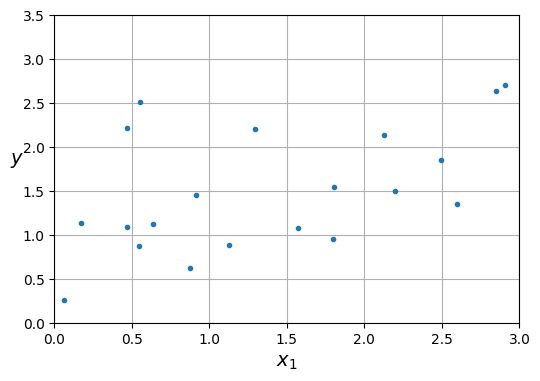

In [ ]:
plt.figure(figsize = (6, 4))
plt.plot(X, y, '.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation = 0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.1, solver = 'cholesky')      #alpha is lambda   cholesky olanda normal equation ile hesablayir grradient descentle yox
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([1.55325833])

#Normal Equation

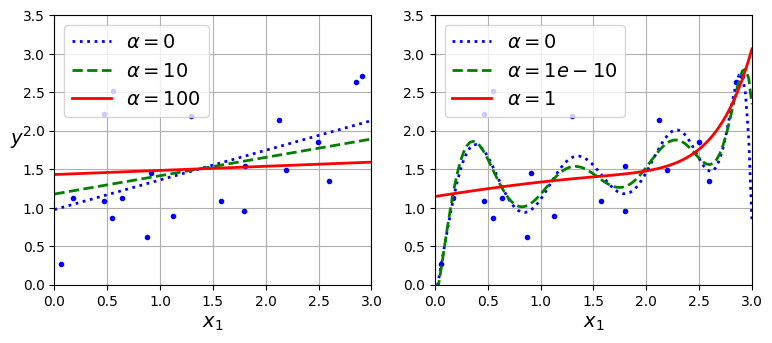

In [ ]:
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **moddel_kwargs):
  plt.plot(X, y, 'b.', linewidth = 3)
  for alpha, style, in zip(alphas, ('b:', 'g--', 'r-')):
    if alpha > 0:
      model = model_class(alpha, **moddel_kwargs)
    else:
      model = LinearRegression()
    if polynomial:
      model = make_pipeline(
          PolynomialFeatures(degree = 10, include_bias = False),
          StandardScaler(),
          model
      )
    model.fit(X, y)
    y_new_regul = model.predict(X_new)
    plt.plot(X_new, y_new_regul, style, linewidth = 2,
             label = fr'$\alpha = {alpha}$')
  plt.legend(loc = 'upper left')
  plt.xlabel('$x_1$')
  plt.axis([0, 3, 0, 3.5])
  plt.grid()

plt.figure(figsize = (9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial = False, alphas = (0, 10, 100), random_state = 42)
plt.ylabel('$y$', rotation = 0)
plt.subplot(122)
plot_model(Ridge, polynomial = True, alphas=(0, 100**-5, 1), random_state = 42)
plt.show()

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty = 'l2',
                       max_iter = 100, eta0 = 0.01, random_state = 42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

In [ ]:
ridge_reg2 = Ridge(alpha = 0.01, solver = 'sag')
ridge_reg2.fit(X, y)
ridge_reg2.predict([[1.5]])

array([1.55355008])

Normal Equation birbasa duzgun cavabi hesablayirdi SGD ise addimlarla

In [ ]:
alpha = 0.1
A = np.array([[0., 0.], [0., 1.]])
X_b = np.c_[np.ones(m), X]   # c_  ==> concatanate
np.linalg.inv(X_b.T @ X_b + alpha * A) @ X_b.T @ y

array([[0.97898394],
       [0.3828496 ]])

In [ ]:
ridge_reg2.intercept_, ridge_reg2.coef_

(array([0.97582695]), array([0.38514876]))

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

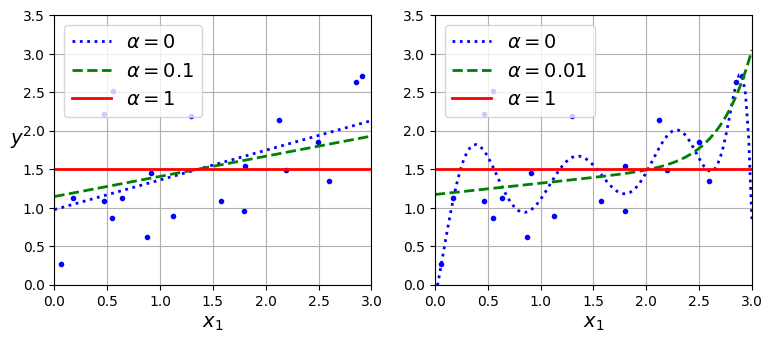

In [ ]:
plt.figure(figsize = (9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial = False, alphas = (0, 0.1, 1), random_state = 42)
plt.ylabel('$y$', rotation = 0)
plt.subplot(122)
plot_model(Lasso, polynomial = True, alphas=(0, 1e-2, 1), random_state = 42)
plt.show()

lassoda alfa 0 olduqda birbas butun weightleri 0a beraber olur

#Elastic Net (L1 ve L2 arasinda)

alpha 1 olsa 1-alpha = 0 onda ridge regression gedir lasso qalir . 0 olsa 0 vuraq moterizenin 2ci hissesi, onda lasso gedir ridge qalir

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)  # alpha yuxaridaki lambdanin yerine gelir, l1_ratio alphanin yerine
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

bir chox halda default olaraq ridge daha yaxsidi

#Logistic Regression

Estimated Probabilities

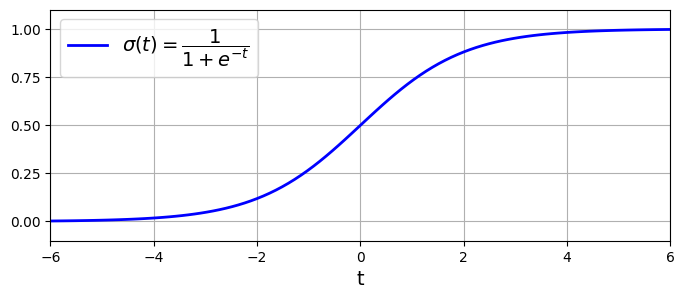

In [ ]:
lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1/(1 + np.exp(-t))

plt.figure(figsize = (8, 3))
plt.plot(t, sig, 'b-', linewidth = 2, label = r'$\sigma(t) = \dfrac{1}{1+e^{-t}}$')
plt.xlabel('t')
plt.legend(loc = 'upper left')
plt.axis([-lim, lim, -0.1 , 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
plt.show()

#Decision Boundaries

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame = True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
iris.target.head(3)

,target
0,0
1,0
2,0


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[['petal width (cm)']].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

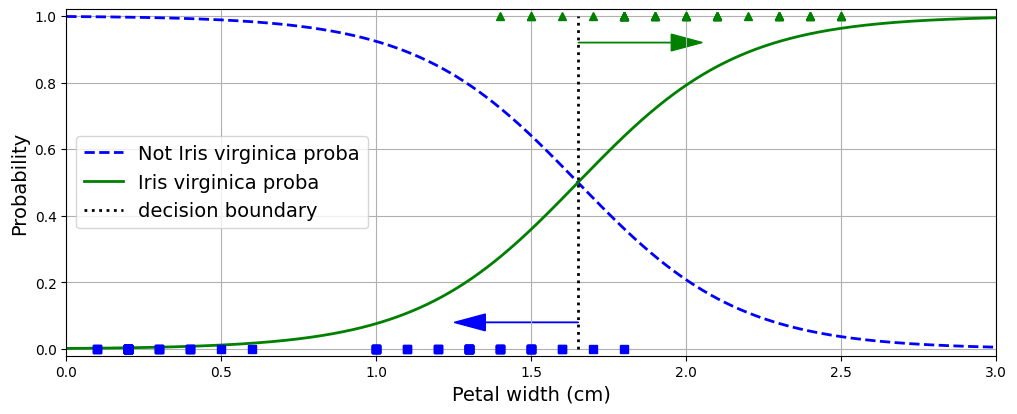

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize = (12, 4.5))
plt.plot(X_new, y_proba[:, 0], 'b--', linewidth = 2,
         label = 'Not Iris virginica proba')
plt.plot(X_new, y_proba[:, 1], 'g-', linewidth = 2, label='Iris virginica proba')
plt.plot([decision_boundary, decision_boundary], [0, 1], 'k:', linewidth = 2,
         label = 'decision boundary')

plt.arrow(x=decision_boundary, y=0.08, dx = -0.3, dy = 0,
          head_width = 0.05, head_length =0.1, fc = 'b', ec='b')
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length = 0.1, fc = 'g', ec = 'g')

plt.plot(X_train[y_train  == 0], y_train[y_train == 0], 'bs')
plt.plot(X_train[y_train  == 1], y_train[y_train == 1], 'g^')

plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')
plt.legend(loc = 'center left')
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
plt.show()